# Emotion prediction using a deep neural network (DNN) with weight sparsity control scheme

This code is to investigate the results of the DNN with weight sparsity control for the prediction of emotion responses using the provided sample data. It is important to check learning curves of the prediction performance obtained from training and test data so that we can justify whether the DNN model properly works or not. In addition, it is necessary to explore the convergence of target sparsity levels in each hidden layer. Here, the optimal sparsity levels of the 1st, 2nd, and 3rd hidden layers were set as 0.7, 0.5, 0.3.


In [1]:
import matplotlib.pyplot as plt
import numpy as np  # Simplification
import scipy.io as sio

# save_path = '/users/khc/code/demo_18aug22'

# save_name = '%s/rst_vlnc_predcition.mat' % (save_path)  # a directory to save dnnwsp result  
save_name = 'rst_vlnc_predcition.mat' # a directory to save dnnwsp result  
datainfo = sio.loadmat(save_name) 

nepoch = datainfo['epch'][0][0];

# load estimated/predicted emotion responses during training 
pct_trvld = datainfo['pct_trvld']; 
pct_tst = datainfo['pct_tst']; 

train_y = datainfo['train_y'];
test_y = datainfo['test_y'];

# load estimated errors during training 
trvld_err = datainfo['trvld_err']; 
ts_err = datainfo['ts_err'];

# sparsity level of each hidden layer
hsply1 = datainfo['hsply1']; # sparsity level estimated from weights between the input and the 1st hidden layer 
hsply2 = datainfo['hsply2']; # sparsity level estimated from weights between the 1st and 2nd hidden layer 
hsply3 = datainfo['hsply3'];# sparsity level estimated from weights between the 2nd and 3rd hidden layer 


# Calculate the correlation coefficients over epochs 
tr_cc = np.zeros((nepoch));  ts_cc = np.zeros((nepoch));

for ii in range(nepoch-1):
    tr_r = np.corrcoef(pct_trvld[ii,:],train_y);
    ts_r = np.corrcoef(pct_tst[ii,:],test_y);
    tr_cc[ii] =tr_r[1,0];
    ts_cc[ii] = ts_r[1,0];

## Plots of the DNN results

The convergence of the training and test errors should be checked

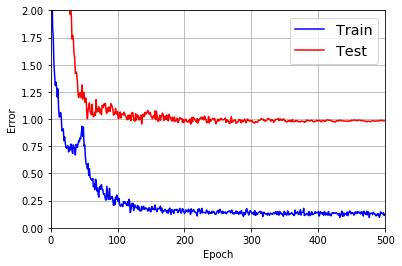

In [2]:
## Plotting DNNP results
t1 = np.arange(0, nepoch, 1)

# Training/test learning curves of the error
plt.figure(1);
plt.plot(t1, trvld_err, 'b', label ='Train')
plt.plot(t1, ts_err, 'r', label ='Test')
plt.axis([0, nepoch, 0, 2]);plt.grid(True)
plt.xlabel('Epoch'); plt.ylabel('Error')
plt.legend(loc='best', fontsize='x-large')
plt.show()

The convergence of the training and test correlation coefficients should be checked

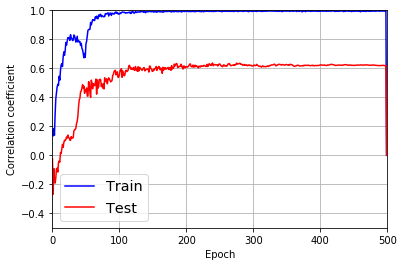

In [3]:
# Training/test learning curves of the correlation coefficient 
plt.figure(2);
plt.plot(t1, tr_cc.flatten(), 'b', label ='Train')
plt.plot(t1, ts_cc.flatten(), 'r', label ='Test')
plt.axis([0, nepoch, -0.5, 1]); plt.grid(True);
plt.xlabel('Epoch'); plt.ylabel('Correlation coefficient')
plt.legend(loc='best', fontsize='x-large')
plt.show()

Our target sparsity levels are set as 0.7, 0.5, 0.3 for the 1st, 2nd, and 3rd hidden layers. 
The sparsity levels are converged to the target sparsity levels of each hidden layer.

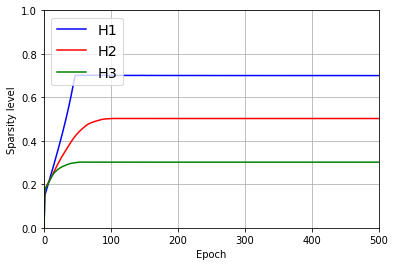

In [4]:
# Sparsity changes over epoch
plt.figure(3);
plt.plot(t1, np.mean(hsply1[t1,:],axis=1), 'b',label ='H1'); # hidden layer 1
plt.plot(t1,  np.mean(hsply2[t1,:],axis=1), '-r',label ='H2'); # hidden layer 2
plt.plot(t1,  np.mean(hsply3[t1,:],axis=1), '-g',label ='H3'); # hidden layer 3
plt.axis([0, nepoch, 0, 1]);plt.grid(True); 
plt.xlabel('Epoch'); plt.ylabel('Sparsity level')
plt.legend(loc='best', fontsize='x-large')
plt.show()

The following code is to check patterns of the estimated emotion response from training and test data.

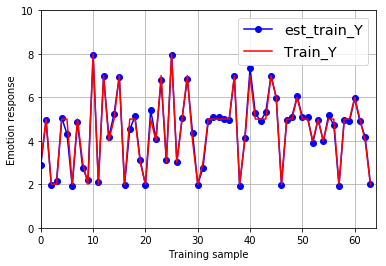

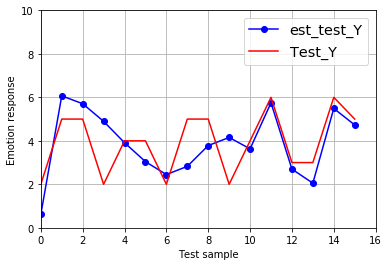

In [5]:
# Plotting of emotion responses and estimated responses obtained from training data

plt.figure(4);

t2 = np.arange(0, pct_trvld.shape[1], 1)

pct_train_y = pct_trvld[nepoch-1,:].flatten()

plt.plot(t2, pct_train_y*10, '-ob', label ='est_train_Y')
plt.plot(t2, train_y.flatten()*10, '-r', label ='Train_Y')
plt.axis([0, pct_trvld.shape[1], 0, 10]); plt.grid(True)

plt.xlabel('Training sample'); plt.ylabel('Emotion response')
plt.legend(loc='best', fontsize='x-large')

plt.figure(5);

t3 = np.arange(0, pct_tst.shape[1], 1); 
pct_test_y = pct_tst[nepoch-1,:].flatten();

plt.plot(t3, pct_test_y*10, '-ob', label ='est_test_Y');
plt.plot(t3, test_y.flatten()*10, '-r', label ='Test_Y');
plt.axis([0, pct_tst.shape[1], 0, 10]); plt.grid(True);

plt.xlabel('Test sample'); plt.ylabel('Emotion response');
plt.legend(loc='best', fontsize='x-large');

plt.show()
